###Full EDA Pipeline

#Importing libraries and loading dataset

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats.distributions import randint
import joblib



In [ ]:
#Loading data
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#Data profiling and Quality check


In [ ]:
#display the number of rows and colums
df.shape

(398, 9)

In [ ]:
#Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
#basic stats
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#To show names and data types of the features
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


In [ ]:
#To show first 5 rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
#to show last 5 rows
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
#Copy df to df_copy
df_copy = df.copy()

In [ ]:
## Check how missing values as it only works if '?' are in string columns
df_copy[df_copy == '?'].count()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
#Replacing '?' with NA in Missing Value
df_copy['horsepower'] = df_copy['horsepower'].replace('?', pd.NA)

#Converting to Numeric Type
df_copy['horsepower'] = pd.to_numeric(df_copy['horsepower'])

#Filling Missing Values with the Median
df_copy['horsepower'].fillna(df_copy['horsepower'].median(), inplace=True)



<ipython-input-617-1751634513>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['horsepower'].fillna(df_copy['horsepower'].median(), inplace=True)


In [ ]:
#Checking again is there null value as ? in dataset
df_copy[df_copy == '?'].count()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
#to check the columns
df_copy.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
#Duplicate rows
df_copy.duplicated().sum()

np.int64(0)

In [ ]:
df_copy['mpg'].value_counts()

,count
mpg,
13.0,20
14.0,19
18.0,17
15.0,16
26.0,14
...,...
28.1,1
24.2,1
30.7,1


In [ ]:
df_copy['cylinders'].unique()


array([8, 4, 6, 3, 5])

In [ ]:
# See region in origin
df_copy['origin'].unique()


array([1, 3, 2])

#Visualizing dataset

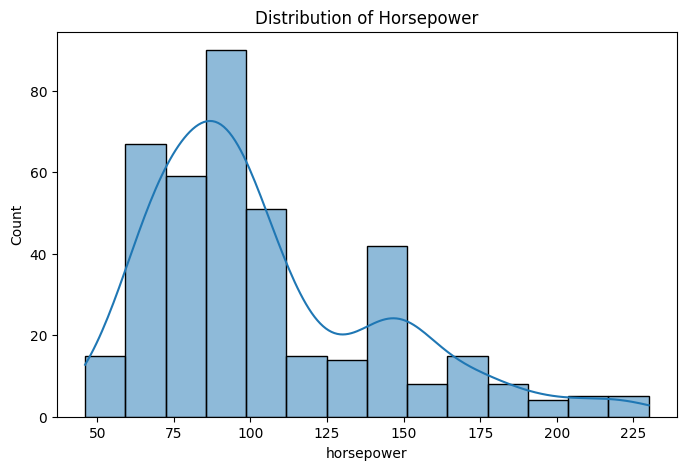

In [ ]:
#check for outliers or skewness in 'horsepower'
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['horsepower'], kde=True)
plt.title("Distribution of Horsepower")
plt.show()


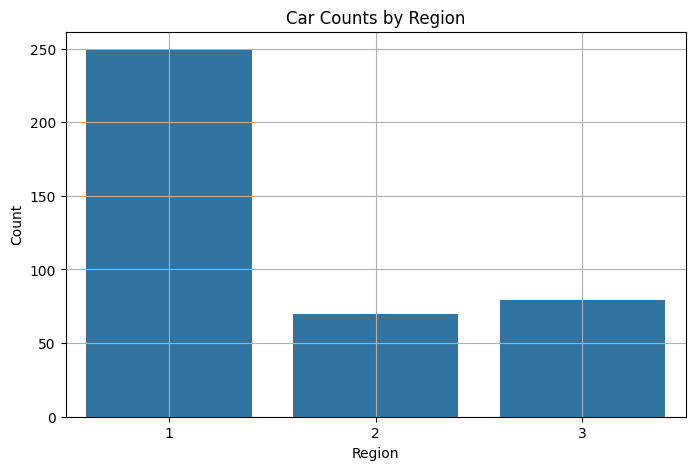

In [ ]:
#Visualize categorical count(Car Counts by Region)
plt.figure(figsize=(8, 5))
sns.countplot(x='origin', data=df_copy)
plt.title('Car Counts by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.grid(True)
plt.show()


<Figure size 1000x800 with 0 Axes>

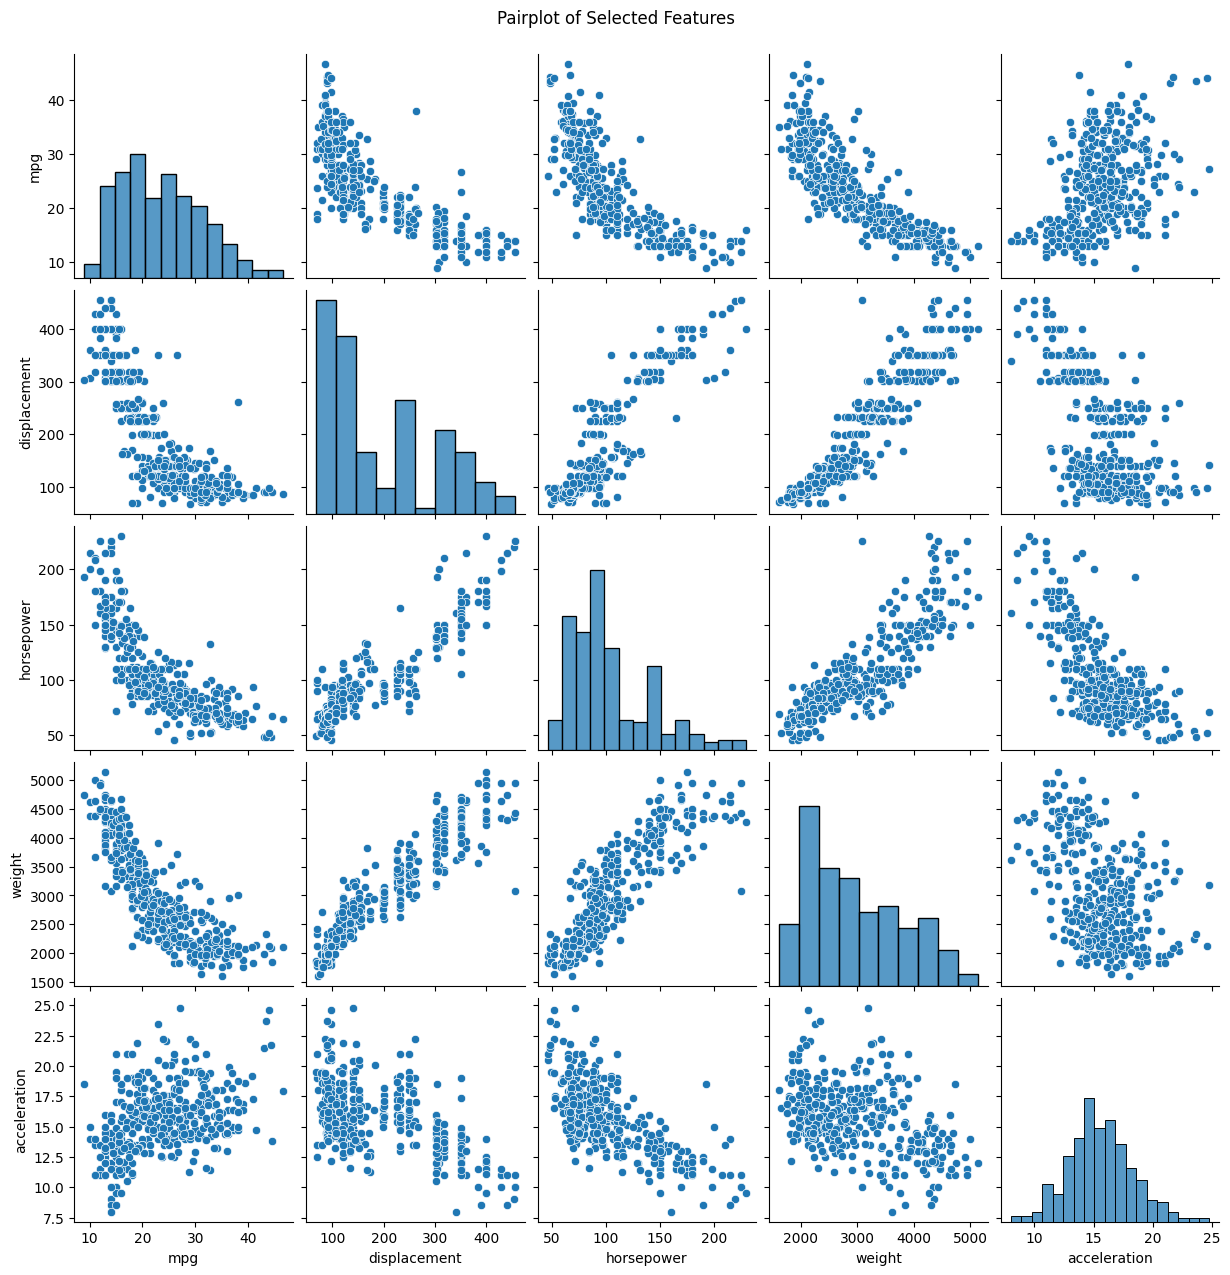

In [ ]:
#Pairplot to observe relationships
plt.figure(figsize=(10, 8))
sns.pairplot(df_copy[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()



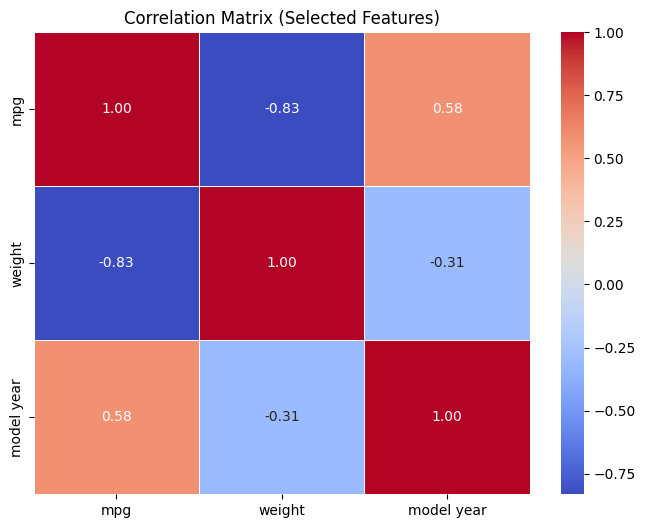

In [ ]:
#correlation matrix

#Select specific features
selected_features = ['mpg',  'weight', 'model year']

# Compute correlation
corr = df_copy[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Selected Features)')
plt.show()


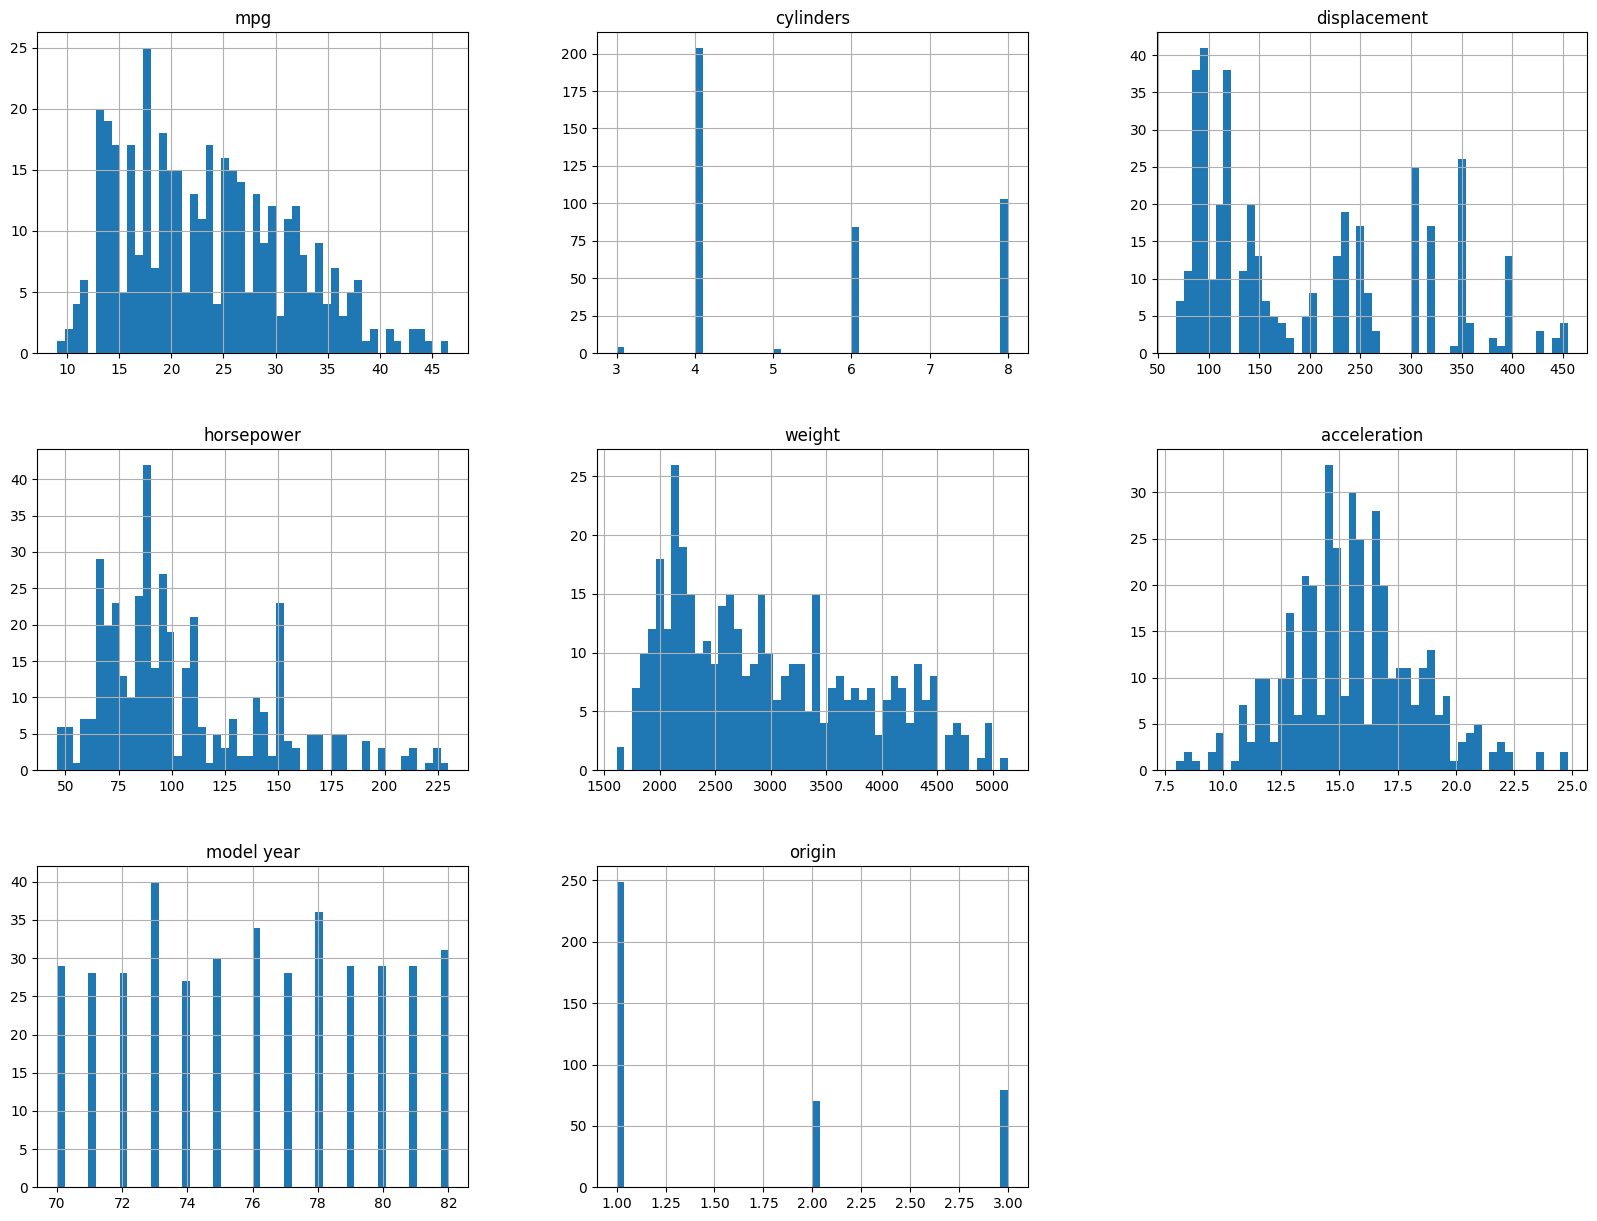

In [ ]:
#histogram for distribution
df_copy.hist(bins=50,figsize=(20,15))
plt.title('Histogram')
plt.show()


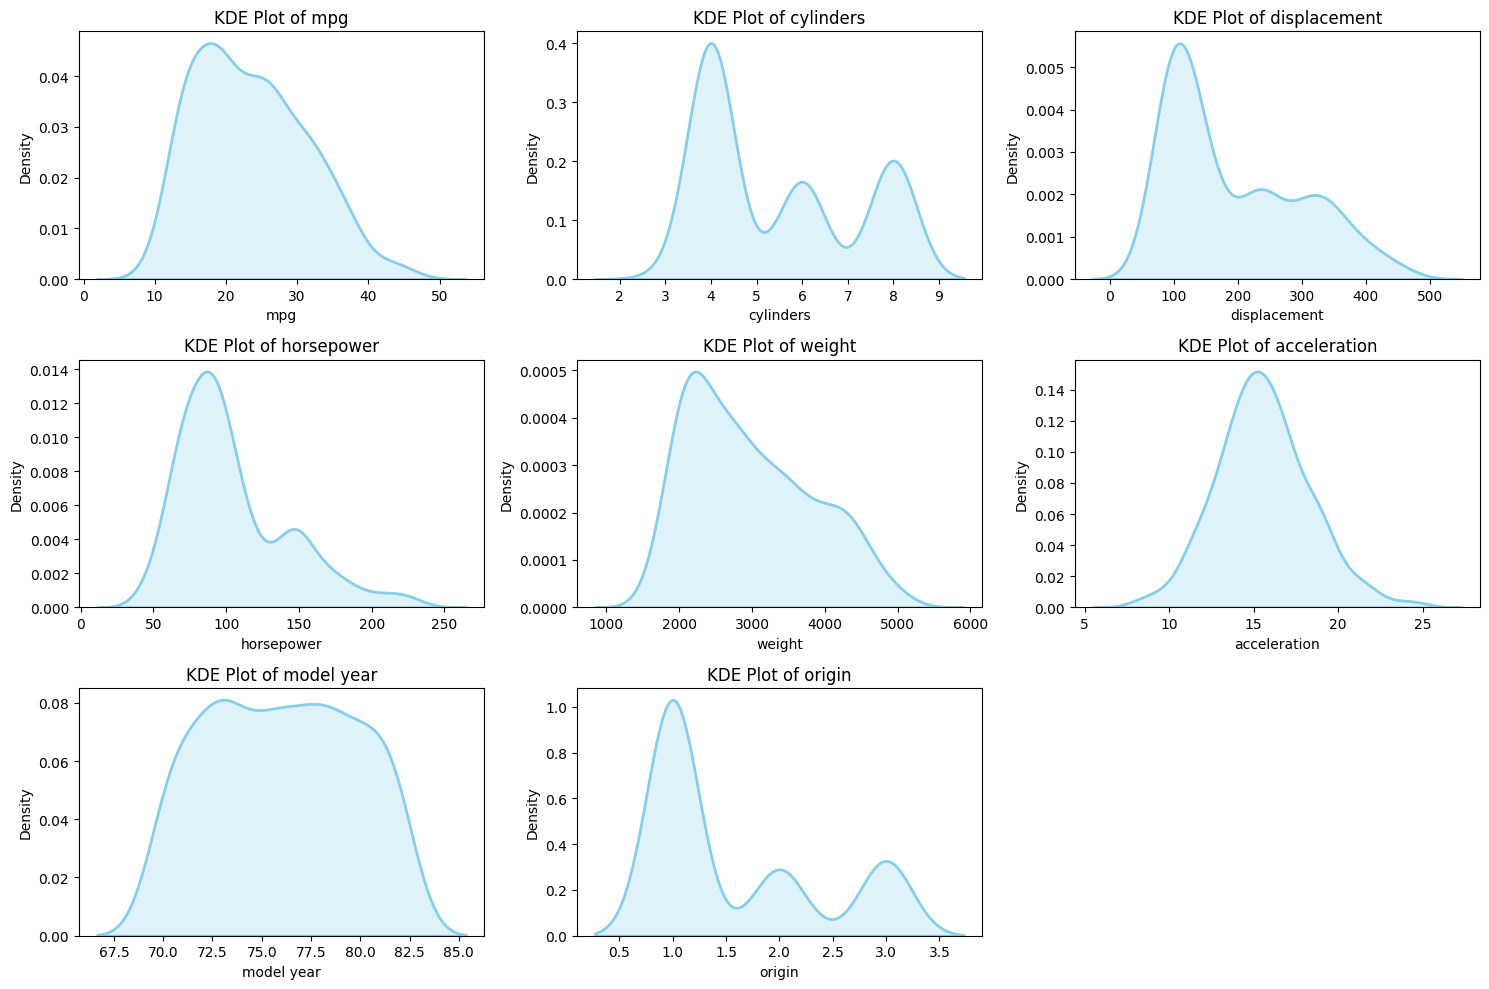

In [ ]:
# Select only numeric columns (excluding categorical)
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot
plt.figure(figsize=(15, 10))

# Plot KDE for each numeric column
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_copy[col], fill=True, color='skyblue', linewidth=2)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

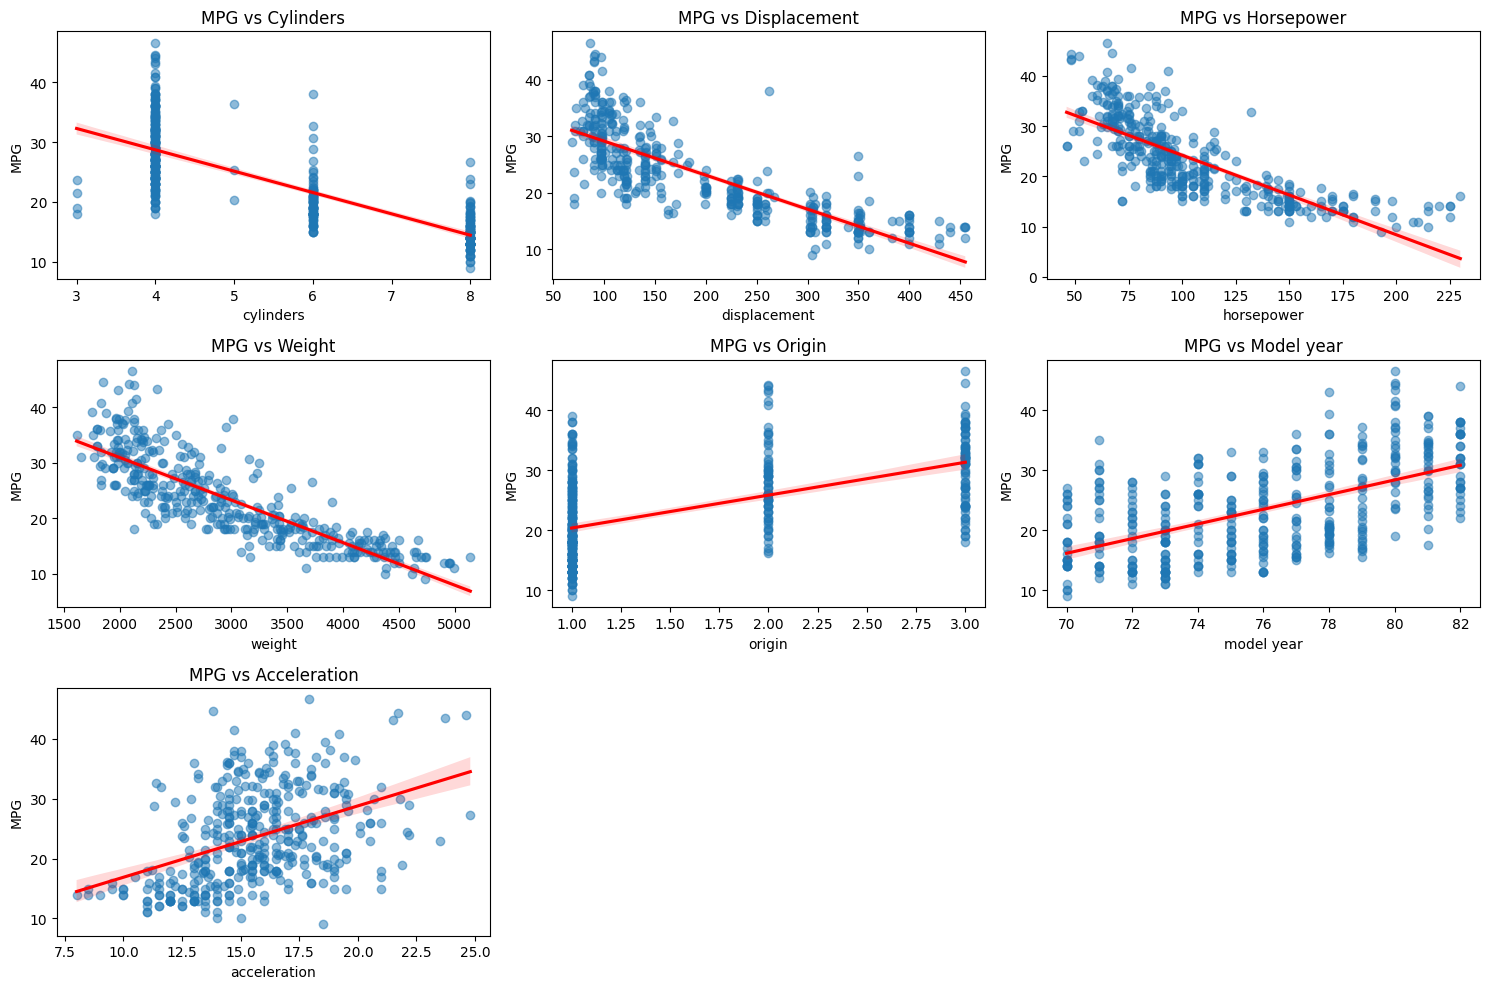

In [ ]:
#Convert relevant columns to numeric if they're not already
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight','origin','model year', 'acceleration']
for feature in numerical_features:
    df_copy[feature] = pd.to_numeric(df_copy[feature], errors='coerce')

# Drop any rows with NaN values that resulted from conversion
df_copy = df_copy.dropna()

# Set up the plot|
plt.figure(figsize=(15, 10))

# Plot regression for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(
        x=df_copy[feature].values,  # Explicitly using numpy array values
        y=df_copy['mpg'].values,
        scatter_kws={'alpha':0.5},
        line_kws={'color':'red'}
    )

    plt.title(f'MPG vs {feature.capitalize()}')
    plt.xlabel(feature)
    plt.ylabel('MPG')

plt.tight_layout()
plt.show()


#Outlier Detection

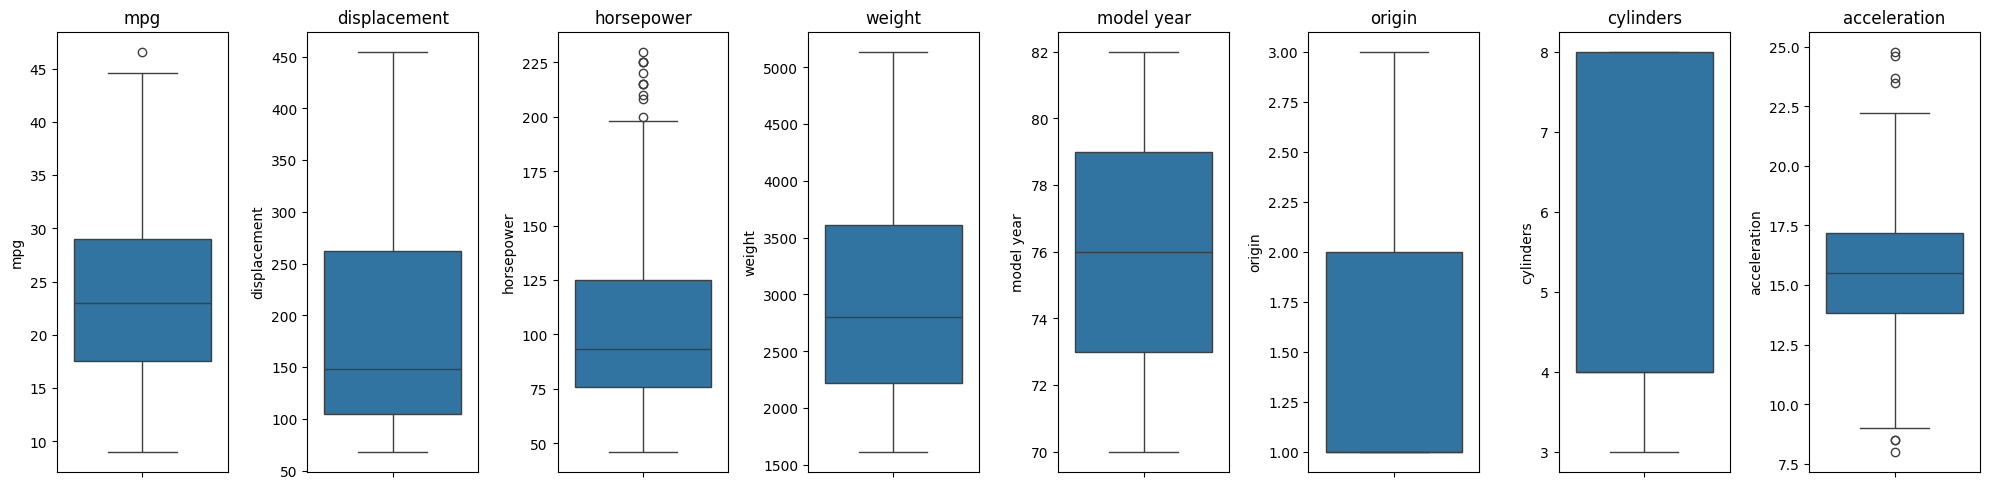

In [ ]:
# Plot boxplots to detect outlier
columns = ['mpg', 'displacement', 'horsepower', 'weight','model year','origin','cylinders','acceleration']
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))

for i in range(len(columns)):
    sns.boxplot(data=df_copy[columns[i]], ax=axes[i])
    axes[i].set_title(columns[i])

plt.tight_layout()
plt.show()


In [ ]:
# Define numerical columns for outlier handling
columns = ['mpg', 'displacement', 'horsepower', 'weight','model year','origin','cylinders','acceleration']

# Function to remove outliers using IQR
def remove_outliers_iqr(df_copy, cols):
    df_clean = df_copy.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only rows within the IQR range
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Applying function
df_copy = remove_outliers_iqr(df_copy, columns)

#printing result
print("After IQR outlier removal:", df_copy.shape)


After IQR outlier removal: (378, 9)


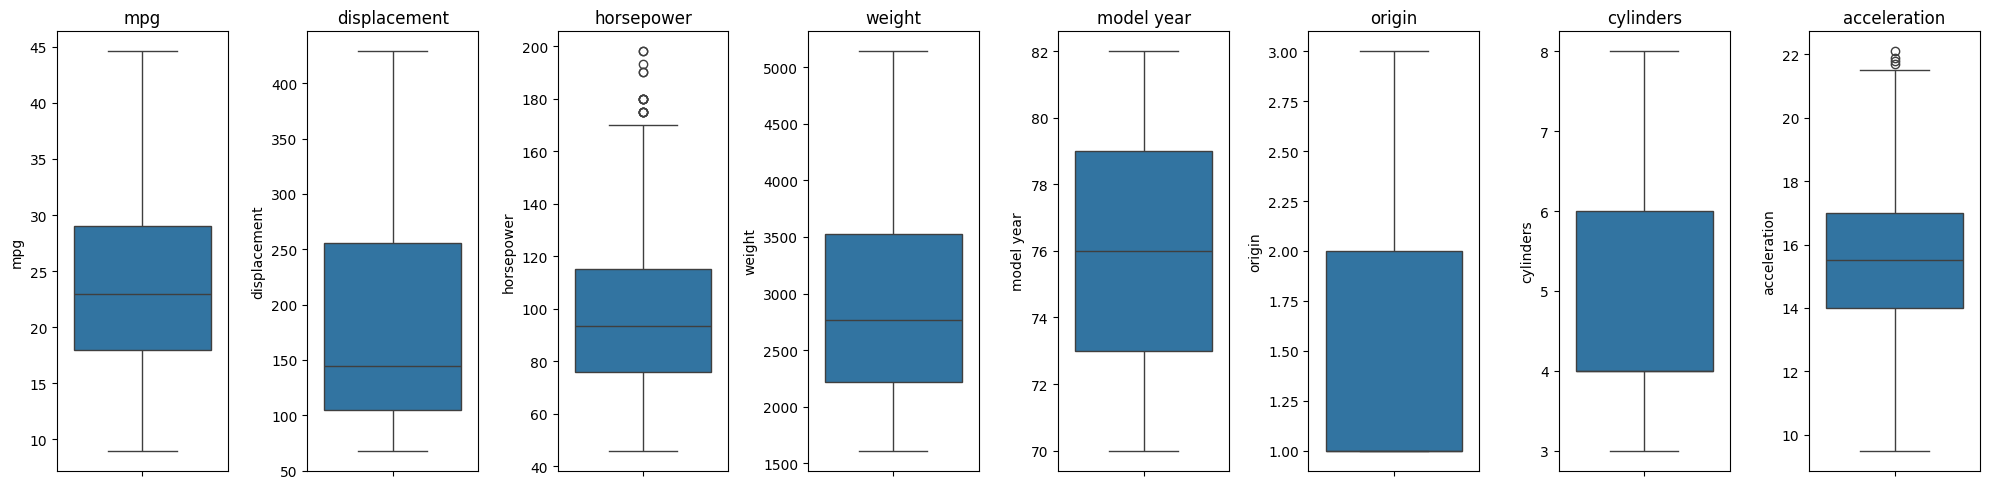

In [ ]:
# Re-plot boxplots to verify after first IQR cleaning
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))
for i, col in enumerate(columns):
    sns.boxplot(data=df_copy[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


In [ ]:
df_copy.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
df_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#Feature Engineering

In [ ]:
# Define numeric columns (as you specified)
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'model year', 'origin', 'cylinders', 'acceleration']

# Convert all specified columns to numeric (handling '?' and other non-numeric values)
for col in numeric_cols:
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')



In [ ]:
df_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
#.Fill missing values (NA/NaN) with column medians
# First ensure we only use the numeric columns that exist in the dataframe
existing_numeric_cols = [col for col in numeric_cols if col in df_copy.columns]
df_copy[existing_numeric_cols] = df_copy[existing_numeric_cols].fillna(df_copy[existing_numeric_cols].median())


In [ ]:
# Create power-to-weight ratio safely
# Handle potential zero weights
df_copy['weight'] = df_copy['weight'].replace(0, 0.001)
df_copy['power_to_weight'] = df_copy['horsepower'] / df_copy['weight']

In [ ]:
df_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,power_to_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.037100
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.044679
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.043655
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.043694
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.040591
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro,0.030508
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,0.030824
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,0.036601
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,0.030095


In [ ]:
 #Handle origin (even though numeric, might want to treat as categorical)
# Convert to string if you want to one-hot encode it
if 'origin' in df_copy.columns:
    df_copy['origin'] = df_copy['origin'].astype(str)
    df_copy = pd.get_dummies(df_copy, columns=['origin'], prefix='origin')


In [ ]:
#Verify no missing values remain
print("Missing values after processing:")
print(df_copy.isnull().sum())

Missing values after processing:
mpg                0
cylinders          0
displacement       0
horsepower         0
weight             0
acceleration       0
model year         0
car name           0
power_to_weight    0
origin_1           0
origin_2           0
origin_3           0
dtype: int64


In [ ]:
# Drop non-numeric columns
if 'car name' in df_copy.columns:
    df_copy.drop('car name', axis=1, inplace=True)


In [ ]:
df_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,power_to_weight,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,0.037100,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0.044679,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0.043655,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0.043694,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0.040591,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,0.030508,True,False,False
393,27.0,4,140.0,86.0,2790,15.6,82,0.030824,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,0.036601,True,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,0.030095,True,False,False


#DATA PREPROCESSING

In [ ]:
#Save cleaned_autompg as csv file

df_copy.to_csv('df_scaled.csv', index=False)

#Training, Testing and Inference

In [ ]:
# Define target and features
X = df_copy.drop(['mpg'], axis=1)# Features
y = df_copy['mpg']#target



In [ ]:
print("x shape:", X.shape)
print("y shape:", y.shape)

x shape: (378, 10)
y shape: (378,)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree Regression":DecisionTreeRegressor(max_depth=5, min_samples_split=5),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5),
    "Support Vector Regression": SVR(),
    "Lasso":Lasso(alpha=0.1)
}


In [ ]:
# Test Set MSE for Comparison
# Evaluate models
test_mse = {}
test_r2={}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        test_mse[name] = mse
        print(f"{name}: MSE = {mse:.4f}")

        r2 = r2_score(y_test, y_pred)
        test_r2[name] = r2
        print(f"{name} Test Set R2: {r2:.4f}")

    except Exception as e:
        print(f"{name} failed: {e}")




Linear Regression: MSE = 13.0984
Linear Regression Test Set R2: 0.8257
Ridge Regression: MSE = 13.3990
Ridge Regression Test Set R2: 0.8217
Decision Tree Regression: MSE = 9.9077
Decision Tree Regression Test Set R2: 0.8682
Random Forest Regression: MSE = 7.1995
Random Forest Regression Test Set R2: 0.9042
Support Vector Regression: MSE = 20.3049
Support Vector Regression Test Set R2: 0.7298
Lasso: MSE = 13.5977
Lasso Test Set R2: 0.8191


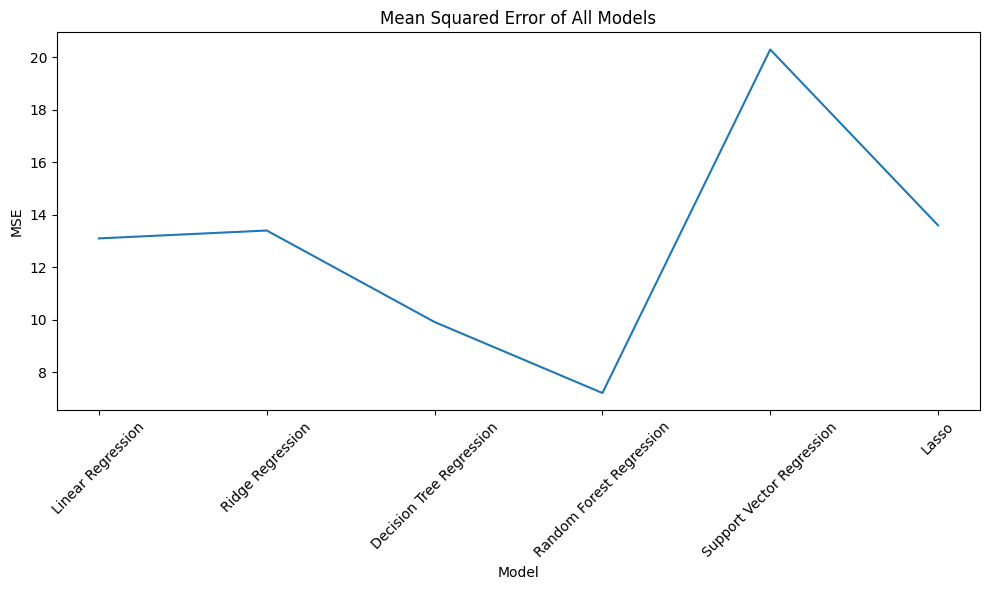

In [ ]:
# lineplot of MSE
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(test_mse.keys()), y=list(test_mse.values()))
plt.title("Mean Squared Error of All Models")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


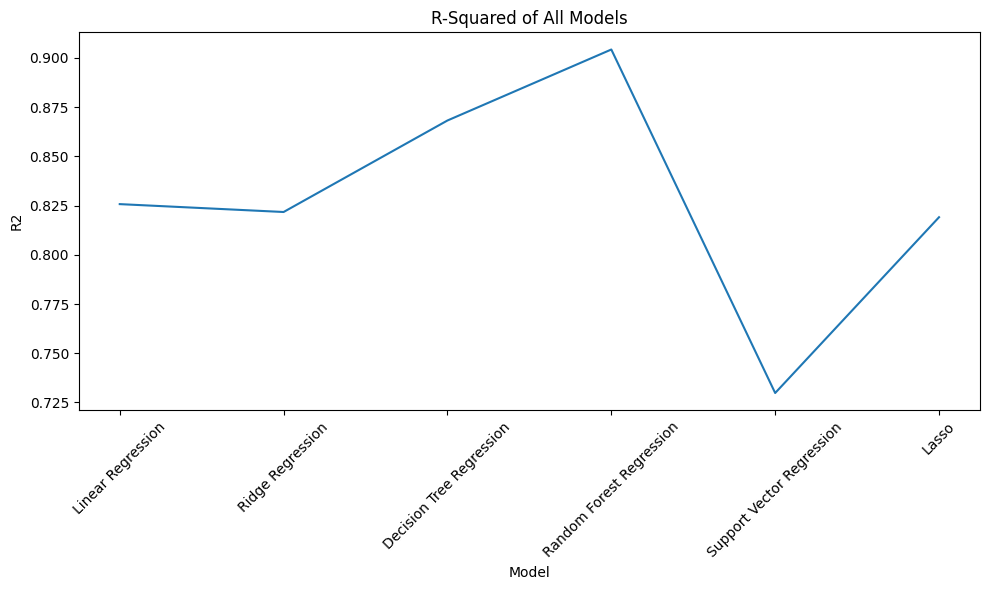

In [ ]:
# lineplot of R2
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(test_r2.keys()), y=list(test_r2.values()))
plt.title("R-Squared of All Models")
plt.xlabel("Model")
plt.ylabel("R2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Baseline Model

In [ ]:
#Train the Model
rf_model_baseline = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1

)

rf_model_baseline.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
#Predict & Evaluate
y_pred = rf_model_baseline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f" Random Forest Baseline Model-Test MSE: {mse:.4f}")


 Random Forest Baseline Model-Test MSE: 7.1652


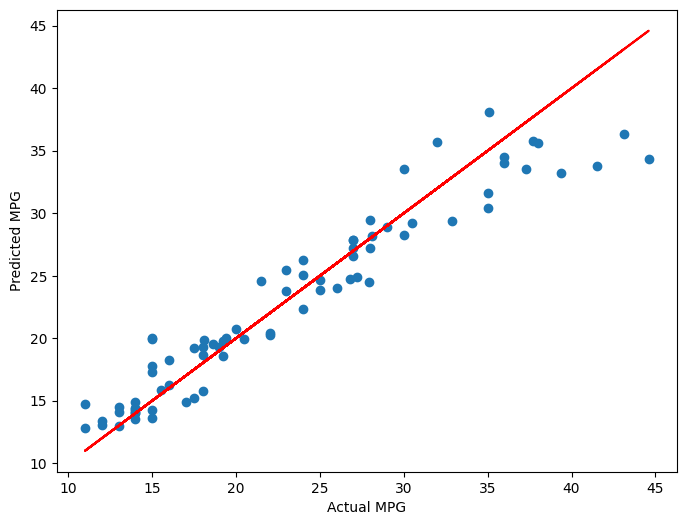

In [ ]:
#Visualize the model prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.plot(y_test,y_test, color='red')
plt.show()


In [ ]:
#Squared errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
rmsle = np.sqrt(msle)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"MSLE: {msle}")
print(f"RMSLE: {rmsle}")



MSE: 7.1651574736841965
RMSE: 2.6767811777738197
R²: 0.9046569324407638
MAE: 1.932289473684209
MSLE: 0.010167789084316346
RMSLE: 0.10083545549218462


In [ ]:
#Absolute errors
mae_baseline = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error : {mae_baseline}")

Mean Absolute Error : 1.932289473684209


In [ ]:
#saving the model"
joblib.dump(rf_model_baseline,'rf_model.pkl')

['rf_model.pkl']

#Hyper-Parameter Tuning

In [ ]:
#HYPERPARAMETER TUNING

param_dist = {
    'bootstrap': [True, False],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6, 8, 10],
    'n_estimators': [50, 100, 150, 200, 250,300]


}
# 'n_estimators': randint(100, 300),
#     'max_depth': [10, 15, 20, 25, None],
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['sqrt', 0.6, 0.8, 0.9],
#     'max_samples': [0.6, 0.7, 0.8, None],
#     'bootstrap': [True]

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
#TUNING EXECUTION

rf_tuner = RandomizedSearchCV(estimator=rf,
                               param_distributions=param_dist,
                               n_iter=100,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               n_jobs=-1)


In [ ]:
rf_tuner.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
y_tuned_pred = rf_tuner.predict(X_test)
t_mse = mean_squared_error(y_test, y_tuned_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_tuned_pred)
mae = mean_absolute_error(y_test, y_tuned_pred)
msle = mean_squared_log_error(y_test, y_tuned_pred)
rmsle = np.sqrt(msle)

print(f"Tuned MSE: {mse:.4f}")
print(f"Tuned RMSE: {rmse:.4f}")
print(f"Tuned R2: {r2:.4f}")
print(f"Tuned MAE: {mae:.4f}")
print(f"Tuned MSLE: {msle:.4f}")
print(f"Tuned RMSLE: {rmsle:.4f}")

Tuned MSE: 7.1652
Tuned RMSE: 2.6768
Tuned R2: 0.8988
Tuned MAE: 1.9832
Tuned MSLE: 0.0109
Tuned RMSLE: 0.1045


In [ ]:
#absolute error for tuned model
mae_best = mean_absolute_error(y_test, y_tuned_pred)
print(f"Mean Absolute Error : {mae_best}")

Mean Absolute Error : 1.983211044379347


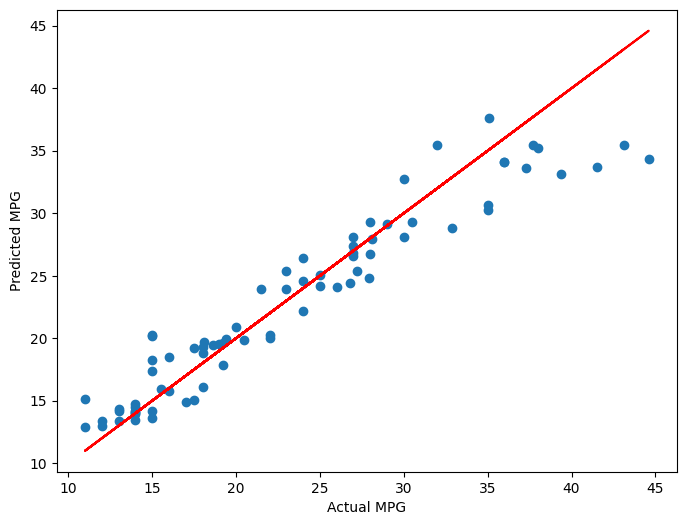

In [ ]:
#visualize tuned model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_tuned_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.plot(y_test,y_test, color='red')
plt.show()

In [ ]:
#save the model

joblib.dump(rf_tuner, "rf_tuned_model.pkl")

['rf_tuned_model.pkl']